# Comparing two means: Unpaired t Test

## Introduction

Observations about the distribution of statistics on samples of random variables allow us to construct tests for hypotheses of difference or similarity. Such hypothesis testing is useful in itself for simple bivariate analysis in practice settings, but it will be particularly critical in later chapters in determining whether models are useful or not.

The purpose of hypothesis testing is to establish a high degree of statistical certainty regarding a claim of difference in a population based on the properties of a sample. Consistent with a high burden of proof, we start from the hypothesis that there is no difference, called the *null hypothesis*.  We only reject the null hypothesis if the statistical properties of the sample data render it very unlikely, in which case we confirm the *alternative hypothesis* that a statistical difference does exist in the population.

Most hypothesis tests can return a p-value, which is the maximum probability of finding the sample results (or results that are more extreme or unusual than the sample results) when the null hypothesis is true for the population. The analyst must decide on the level of p-value needed to reject the null hypothesis. This threshold is referred to as the significance level $\alpha$ (alpha). A common standard is to set $\alpha$ at 0.05.That is, we reject the null hypothesis if the p-value that we find for our sample results is less than 0.05. If we reject the null hypothesis at $\alpha = 0.05$, this means that the results we observe in the sample are so extreme or unusual that they would only occur by chance at most 1 in 20 times if the null hypothesis were true. An alpha of 0.05 is not the only standard of certainty used in research and practice, and in some fields of study smaller alphas are the norm, particularly if erroneous conclusions might have very serious consequences.

Three of the most common types of hypothesis tests are:

1. Testing for a difference in the means of two groups -> calculate a **test statistic**.
2. Testing for a non-zero correlation between two variables -> determine an **expected distribution** for that test statistic.
3. Testing for a difference in frequency distributions between different categories -> determine where our calculated statistic falls in that distribution in order to assess the **likelihood of our sample** occurring if the null hypothesis is true.

## Descriptive statistics of the two samples

In [1]:
import numpy as np
from scipy import stats
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data from Table 30.1 (page 295)
old = np.array([20.8, 2.8, 50, 33.3, 29.4, 38.9, 29.4, 52.6, 14.3])
young=np.array([45.5, 55, 60.7, 61.5, 61.1, 65.5, 42.9, 37.5])

### Normality testing

In [3]:
k2, pval = stats.normaltest(old)
print('old', f"D'Agostino-Pearson omnibus K2={k2:.2f}", f"p-value={pval:.3f}", sep='\t')
k2, pval = stats.normaltest(young)
print('young', f"D'Agostino-Pearson omnibus K2={k2:.2f}", f"p-value={pval:.3f}", sep='\t')

tstat, pval = stats.shapiro(old)
print('old', "Shapiro-Wilk's normality test p-value", round(pval, 3), sep='\t')
tstat, pval = stats.shapiro(young)
print('young', "Shapiro-Wilk's normality test p-value", round(pval, 3), sep='\t')
# if the P value from a normality test is large, the data are not inconsistent with a Gaussian distribution 

old	D'Agostino-Pearson omnibus K2=0.11	p-value=0.947
young	D'Agostino-Pearson omnibus K2=1.75	p-value=0.418
old	Shapiro-Wilk's normality test p-value	0.9
young	Shapiro-Wilk's normality test p-value	0.238


C:\Users\WIECKOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\WIECKOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
pg.normality(old)

,W,pval,normal
0,0.970675,0.900443,True


In [5]:
pg.normality(young)

,W,pval,normal
0,0.890741,0.23777,True


### Testing the assumption of equal variances (_homoscedasticity_)

In [6]:
stats.describe(old), stats.describe(young)

(DescribeResult(nobs=9, minmax=(2.8, 52.6), mean=30.16666666666667, variance=259.0375, skewness=-0.17569385392311104, kurtosis=-0.8080848898945967),
 DescribeResult(nobs=8, minmax=(37.5, 65.5), mean=53.7125, variance=107.4069642857143, skewness=-0.4421628669270582, kurtosis=-1.3632352105713499))

In [7]:
ratio_var = np.std(old, ddof=1) / np.std(young, ddof=1) # ratio of the variances of the two groups
print(f"The old individuals have an SD {ratio_var:.2f} times larger than that of young individuals.")

F_ratio = ratio_var**2
print(f"F ratio = {F_ratio:5.3f}")

p_val = 2 * (1 - stats.f.cdf(F_ratio, len(old)-1, len(young)-1)) # for two-sided (see Crawley, the R book, p.355)
print(f"P value for the F-test of equal variance={p_val:.4f}")

The old individuals have an SD 1.55 times larger than that of young individuals.
F ratio = 2.412
P value for the F-test of equal variance=0.2631


If the null hypothesis of equal variances were true, there would be a 26% chance that random sampling would result in this large discrepancy between the two SD values as observed here (or larger still).

What if the P value is small, indicating that the assumption of equal variances is unlikely to be true? There is no real consensus, but in biology we may ignore the result. The t-test is fairly robust to violations of the assumption of equal variances as long as the sample size isn't tiny and the two samples have an equal, or nearly equal, number of observations.

In [8]:
pg.homoscedasticity([young, old], method='levene') #test statistic W for Levene (using F-distribution), T for Bartlett (chi²)

,W,pval,equal_var
levene,0.686405,0.420378,True


### Visualization

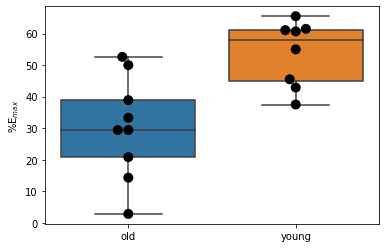

In [9]:
sns.boxplot(data=[old, young]) # we can also plot a list of arrays!
sns.swarmplot(data=[old, young], color='black', size=10)
plt.ylabel(r"%E$_{max}$")
plt.xticks([0,1], ['old', 'young']);

## Testing for a difference in means

In [10]:
mean_diff = np.mean(young) - np.mean(old)
print(f"mean difference = {mean_diff:5.3f}")

mean difference = 23.546


In [11]:
stats.ttest_ind(young, old, equal_var=True)

Ttest_indResult(statistic=3.531487707161938, pvalue=0.0030218492023012695)

In [12]:
# pingouin ttest method calls the scipy.ttest_ind method but also add some important information incl. CI
pg.ttest(young, old, correction=False) # specify whether or not to correct for unequal variances using Welch separate variances T-test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.531488,15,two-sided,0.003022,"[9.33, 37.76]",1.715995,12.56,0.909532


Because the 95% CI of the mean difference does not include zero, we are 95% confident that the mean response in old individuals is less than the mean response in young ones.

### The t ratio for equal variance

The P value is computed from the _t ratio_ which is computed from the difference between the two sample means and the SD and sample size of each group, such as

$$ t = \frac{(\overline x_1 - \overline x_2 - 0)}{\sqrt{s^2(\frac{1}{n_1} + \frac{1}{n_2})}} = \frac{(\overline x_1 - \overline x_2 - 0)}{s \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

$$ s^2=\frac{\sum_{i=1}^{n_1}(x_i - \overline x_1)^2 + \sum_{j=1}^{n_2}(x_j - \overline x_2)^2}{n_1+n_2-2} $$

where $\overline x_1$ and $\overline x_2$ are the sample means, $s^2$ is the **pooled sample variance**, $n_1$ and $n_2$ are the sample sizes and $t$ is a Student t quantile with $n_1 + n_2 - 2$ degrees of freedom (Df).

We can compute the **pooled standard deviation** as follows:

$$ s = \sqrt{\frac{(n_1-1)\sigma_1^2 + (n_2-1)\sigma_2^2}{n_1+n_2-2}} $$

#### What happens for 2 populations with same variance and same sample size?

In the situation where $n_1 = n_2 = n$ and $\sigma_1^2 = \sigma_2^2 = \sigma^2$, then

$$ s = \sqrt{\frac{(n-1)\sigma^2 + (n-1)\sigma^2}{n + n - 2}} = \sqrt{\frac{2(n-1)\sigma^2}{2 (n -1)}} = \sigma $$

Therefore

$$ t = \frac{\overline x_1 - \overline x_2}{\sigma\sqrt{2/n}} $$

In [13]:
n_old  = len(old)
n_young= len(young)
Df = n_old + n_young - 2 # this is true only for equal variances, otherwise use Welch-Satterthwaite method (see later)

s_old = (n_old - 1)*np.std(old,  ddof=1)**2 # with SE = SD / sqrt(n)
s_young=(n_young-1)*np.std(young,ddof=1)**2
s_pooled = ((s_old + s_young) / Df)**.5

SE_pooled = (s_pooled * (1/n_old + 1/n_young)**0.5)

t_ratio = mean_diff / SE_pooled

print(f"t ratio = {t_ratio:.6f} with {Df} degrees of freedom, assuming equal variance, with pooled SE = {SE_pooled:.2f}")

t ratio = 3.531488 with 15 degrees of freedom, assuming equal variance, with pooled SE = 6.67


In [14]:
t_ = stats.t(df=Df).ppf((1+.95)/2) # two-tailed

CI_diff_mean = (mean_diff - t_ * SE_pooled, mean_diff + t_ * SE_pooled)

print(f"the mean difference {mean_diff:.2f} CI (95%) extends from {CI_diff_mean[0]:.3f} to {CI_diff_mean[1]:.3f}")

the mean difference 23.55 CI (95%) extends from 9.335 to 37.757


### t ratio and degrees of freedom for unequal variances

For the situation of unequal variances, the Satterthwaite's approximate t test is used, a method in the Behrens-Welch family where $d$ is the Behrens-Welch test statistic evaluated as a Student t quantile with _df freedom using Satterthwaite's approximation_:

$$d=(\overline x_1 - \overline x_2) / \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$$

Note that is often more robust, i.e. in detecting difference between means, to use the nonparametric Mann-Whitney test as an alternative method in the presence of unequal variances.

We calculate the standard error of the combined sample using the formula:

$$ s_\mathrm{unequal} = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} $$

where $\sigma_{\mathrm{1}}$ and $\sigma_{\mathrm{2}}$ are the standard deviations of the two samples and $n_{\mathrm{1}}$ and $n_{\mathrm{2}}$ are the two sample sizes.

We use a special formula called the [Welch-Satterthwaite approximation](https://en.wikipedia.org/wiki/Welch-Satterthwaite_equation) to calculate the degrees of freedom for the two samples

$$ \mathrm{DF} = \frac{\mathrm{s_\mathrm{unequal}}^4}{\frac{\sigma_1^4}{n_1-1} + \frac{\sigma_2^4}{n_2-1}} $$

In [26]:
se_old =   np.std(old, ddof=1)   / n_old  **.5 # equivalent to stats.sem(old), with SE = SD / sqrt(n)
se_young = np.std(young, ddof=1) / n_young**.5

SE_pooled_unequal = (se_old**2 + se_young**2)**.5

df_unequal = SE_pooled_unequal**4/(se_old**4/(len(old)-1) + se_young**4/(len(young)-1))

t_ratio_unequal = mean_diff / SE_pooled_unequal
print(f"t ratio = {t_ratio_unequal:.6f} with {df_unequal:.4f} degrees of freedom, assuming unequal variance, with pooled SE = {SE_pooled_unequal:.2f}")

t ratio = 3.624246 with 13.7780 degrees of freedom, assuming unequal variance, with pooled SE = 6.50


In [25]:
t_unequal = stats.t(df=df_unequal).ppf((1+.95)/2) # two-tailed

CI_diff_mean_unequal = (mean_diff - t_unequal * SE_pooled_unequal, mean_diff + t_unequal * SE_pooled_unequal)

print(f"the mean difference {mean_diff:.2f} CI (95%) extends from {CI_diff_mean_unequal[0]:.3f} to {CI_diff_mean_unequal[1]:.3f}")

the mean difference 23.55 CI (95%) extends from 9.591 to 37.501


#### Confirmation with scipy.stats and pingouin methods

In [20]:
stats.ttest_ind(young, old, equal_var=False) # also called the Welch's t-test

Ttest_indResult(statistic=3.6242456851120375, pvalue=0.002828426914881655)

In [21]:
pg.ttest(young, old, correction=True) # specify whether or not to correct for unequal variances using Welch separate variances T-test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.624246,13.777968,two-sided,0.002828,"[9.59, 37.5]",1.715995,14.51,0.909532


### P value

To find the p-value by hand, we need to use the t-Distribution with Df degrees of freedom.

In [27]:
pval = 2 * (1 - stats.t.cdf(x = abs(t_ratio), df=Df))  # two-sided pvalue = Prob(abs(t)>t_ratio)
print(f"The P value = {pval:.7f}, assuming equal variance")

pval_unequal = 2 * (1 - stats.t.cdf(x = abs(t_ratio_unequal), df=df_unequal))  # two-sided pvalue = Prob(abs(t)>t_ratio)
print(f"The P value = {pval_unequal:.7f}, assuming unequal variance")

The P value = 0.0030218, assuming equal variance
The P value = 0.0028284, assuming unequal variance


#### Visualization of the t-critical value and t-statistic

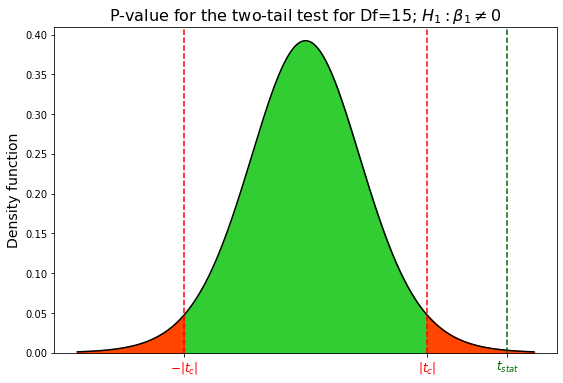

In [28]:
x = np.linspace(start = -4, stop = 4, num = int(1e5))
hx = stats.t.pdf(x, df = Df)

# Plot the density
fig, ax = plt.subplots(num = 2, figsize = (9, 6))
plt.plot(x, hx, color = "black")
plt.margins(y = 0)
plt.ylim((0, 0.41))
# Shade the probability p-value
plt.fill_between(x[x <= t_ratio], hx[x <= t_ratio], edgecolor = None, color = 'limegreen')
# plot the observed t-statictic:
plt.axvline(x = t_ratio, color = "darkgreen", linestyle = "--")
# Shade the probability alpha / 2
plt.fill_between(
    x[x <= -np.abs(t_)], hx[x <= -np.abs(t_)],
    edgecolor = "orangered", linestyle = "-", linewidth = 2, facecolor = 'orangered')
# Shade the probability 1 - alpha / 2
plt.fill_between(
    x[x >= np.abs(t_)], hx[x >= np.abs(t_)], 
    edgecolor = "orangered", linestyle = "-", linewidth = 2, facecolor = 'orangered')

# plot the critical value -|t_c| and t_c|:
plt.axvline(x = -np.abs(t_), color = "red", linestyle = "--")
plt.axvline(x = np.abs(t_), color = "red", linestyle = "--")

ax.set_xticks([-np.abs(t_), t_ratio, np.abs(t_)])
ax.set_xticklabels(["$-|t_c|$", "$t_{stat}$", "$|t_c|$"], fontdict={'size': 12})
ax.get_xticklabels()[0].set_color("red")
ax.get_xticklabels()[1].set_color("darkgreen")
ax.get_xticklabels()[2].set_color("red")
plt.ylabel('Density function', fontdict={'size': 14})
plt.title(f"P-value for the two-tail test for Df={Df}; $H_1: \\beta_1 \\neq 0$", fontdict={'size': 16});

The red dashed lines in this diagram represent the 95% confidence interval around the mean difference of our two samples. The 'tails' of the curve outside of these two lines each represent a maximum of 0.025 probability for the true population mean. So we can see that the position of the green dot-dashed line can correspond to a *maximum probability* that the population mean difference is zero.
This is the *p-value* of the hypothesis test. We call this type of hypothesis test a *two-tailed* test, because the tested population mean can be either higher or lower than the sample mean, thus it can appear in any of the two tails for the null hypothesis to be rejected. *One-tailed* tests are used when you are testing for an alternative hypothesis that the difference is specifically 'less than zero' or 'greater than zero'.

The p-value can be derived by calculating the standard error multiple associated with zero in the $t$-distribution (called the *$t$-statistic* or *$t$-value*), by applying a conversion function to obtain the upper tail probability and then multiplying by 2 to get the probability associated with both tails of the distribution.

### Rules of thumbs for interpreting error bars that overlap or not

|  Type  |    overlap    |  no overlap   |
| ------ | ------------- | ------------- |
|   SD   | no conclusion | no conclusion |
|  SEM   |   P > 0.05    | no conclusion |
| 95% CI | no conclusion |   P < 0.05    |

### Methods with dataframes

By using an appropriate hypothesis test, determine if the mean age of those who made a recent donation is different from those who did not.

In [29]:
# let's get another toy dataset
import peopleanalyticsdata as pad

# pad.list_sets() # to get the list of the datasets included

df = pad.charity_donation()
# also from http://peopleanalytics-regression-book.org/data/charity_donation.csv

df.head()

,n_donations,total_donations,time_donating,recent_donation,last_donation,gender,reside,age
0,2,310,27,0,4,M,Urban Domestic,29
1,3,1200,22,0,6,M,Rural Domestic,41
2,3,1200,37,1,11,M,Urban Domestic,77
3,2,760,19,1,1,F,Overseas,66
4,6,2540,37,0,11,M,Urban Domestic,26


In [30]:
# binary dependent variable
df['recent_donation'].unique()

array([0, 1], dtype=int64)

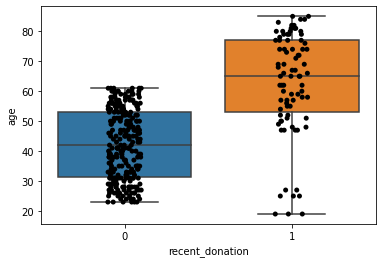

In [31]:
sns.boxplot(
    x='recent_donation',
    y='age',
    data=df
)

sns.stripplot(
    x='recent_donation',
    y='age',
    data=df,
    color='black',
);

In [32]:
# we first check for equal variance, although it doesn't look True on the plot
pg.homoscedasticity(
    data=df,
    dv='age', # long format dataframe
    group='recent_donation'
)

,W,pval,equal_var
levene,14.446737,0.00017,False


In [33]:
# because the variances aren't equal, we use the Welch's t-test
ix = df['recent_donation'] == 1

pg.ttest(
    x=df[ix] ['age'],
    y=df[~ix]['age'],
    correction=True, # Welch's t-test
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.207145,105.150578,two-sided,2.069049e-17,"[16.51, 24.48]",1.577989,2.514e+18,1.0


In [34]:
# confirmed using pingouin
pg.ttest(
    x=df[ix] ['age'],
    y=df[~ix]['age'],
    correction='auto', # automatically uses Welch T-test when the sample sizes are unequal (default)
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.207145,105.150578,two-sided,2.069049e-17,"[16.51, 24.48]",1.577989,2.514e+18,1.0


### One-sided t-test

By using an appropriate hypothesis test, determine if the age of those who have recently donated is at least 10 years older than those who have not recently donated in the population.

We are trying to establish if $\bar{x_1} - 10 > \bar{x_0}$ in the population. Alternatively stated, we are testing if $\overline{x_1 - 10} > \bar{x_0}$ in the population, so we are doing a _t_-test in our sample to compare $x1 - 10$ with $x0$. Our null hypothesis is that there is no difference between the means of $x1 - 10$ and $x0$. Our alternative hypothesis is that the mean of $x1 - 10$ is greater than the mean of $x0$. This requires a one sided t-test.

In [35]:
pg.ttest(
    x=df[ix] ['age'] - 10,
    y=df[~ix]['age'],
    alternative='greater' #`greater` tests against the alternative hypothesis that the mean of x is greater than the mean of y
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.226802,105.150578,greater,4.403095e-07,"[7.16, inf]",0.808046,8.275e+04,1.0


The p-value of this test meets an alpha standard of 0.001 and this confirms the alternate hypothesis that those who donated are at least ten years older than those who did not.

In [37]:
# alternatively we can use ttest_ind method from scipy.stats

stats.ttest_ind(
    df[ix] ['age'] - 10,
    df[~ix]['age'],
    equal_var=False,
    alternative='greater', # defines the alternative hypothesis
)

Ttest_indResult(statistic=5.2268021732859635, pvalue=4.4030947228348503e-07)

In [38]:
stats.ttest_ind(
    df[ix] ['age'],
    df[~ix]['age'] + 10,
    equal_var=False,
    alternative='greater', # defines the alternative hypothesis
)

Ttest_indResult(statistic=5.2268021732859635, pvalue=4.4030947228348503e-07)

In [39]:
# using statsmodels
import statsmodels.api as sm

sm.stats.ttest_ind(
    df[ix] ['age'],
    df[~ix]['age'],
    usevar='unequal',
    alternative='larger',
    value=10 # difference between the means under the null hypothesis
)

(5.2268021732859635, 4.4030947228348514e-07, 105.15057759463707)

## Computing CI and P value with bootstraping

The P value is obtained by computing the sampling distribution of a test statistic under the null hypothesis and then, the percentile of the observed test statistic in the distribution.

Here H0 is that the data are equally distributed over the 2 groups, so H1 is that the groups are different, i.e. the difference of their means is different from 0.

For bootstraping we use permutation replicate, with the **test statistic being the difference between the means**. The P value is therefore the probability of obtaining a value of the test statistic that is at least as extreme as what observed, under the assumption of H0.

For testing for the same distribution, we use permutation test, for same mean, mean shifting as below.

### Mean Difference of the means and CI

In [40]:
# we create 10000 replicates of the difference of the means
bs_old = np.array( [np.mean(np.random.choice(old, size=len(old)))    for _ in range(10000)])
bs_young= np.array([np.mean(np.random.choice(young,size=len(young))) for _ in range(10000)])

bs_mean_diff = bs_young - bs_old

In [41]:
CI_mean_diff_bs = np.round(np.percentile(bs_mean_diff, [2.5, 97.5]), 2)
print(f"mean difference using bootstraping = {np.mean(bs_mean_diff):5.2f}")
print(f"corresponding 95% CI of the mean difference of the means = {CI_mean_diff_bs}")

mean difference using bootstraping = 23.48
corresponding 95% CI of the mean difference of the means = [11.4  35.61]


### Boostrap replicates

In [42]:
# We test H0 that data have the same mean
combined_mean = np.mean(np.concatenate([old, young]))

In [43]:
# We create shifts in both groups
young_shifted = young - np.mean(young) + combined_mean
old_shifted   = old   - np.mean(old)   + combined_mean

In [44]:
# We draw bootstrap replicates with same size as the original dataset
np.random.seed(999)
bs_shifted_young = np.array([np.mean(np.random.choice(young_shifted, size=len(young))) for _ in range(10000)])
bs_shifted_old   = np.array([np.mean(np.random.choice(old_shifted,   size=len(old)))   for _ in range(10000)])
bs_diff_shifted  = bs_shifted_young - bs_shifted_old # same test statistic as for the original difference of the means

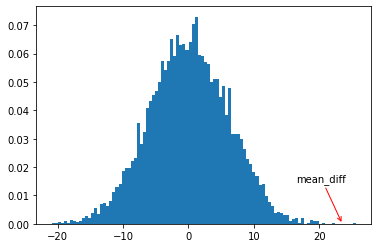

In [45]:
plt.hist(bs_diff_shifted, density=True, bins=100)
plt.annotate(
    'mean_diff',
    xy=(mean_diff, 0),
    xytext=(mean_diff-7, .015),
    arrowprops={'arrowstyle': '->', 'color': 'red'}
);

In [46]:
P_value_bs = np.sum(bs_diff_shifted >= mean_diff) / len(bs_diff_shifted)
print(f"P value obtained using bootstraping = {P_value_bs:7.6f}")

P value obtained using bootstraping = 0.000100
